In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
score_data=pd.read_csv(r"C:\Users\Adhi Ganapathy\Documents\Python_ws\Linear Regression 13072025\GAP Prediction.csv")

In [3]:
print(type(score_data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
score_data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
score_data.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [6]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [7]:
score_data.isnull().any()

SAT    False
GPA    False
dtype: bool

In [8]:
score_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


array([[<Axes: title={'center': 'SAT'}>, <Axes: title={'center': 'GPA'}>]],
      dtype=object)

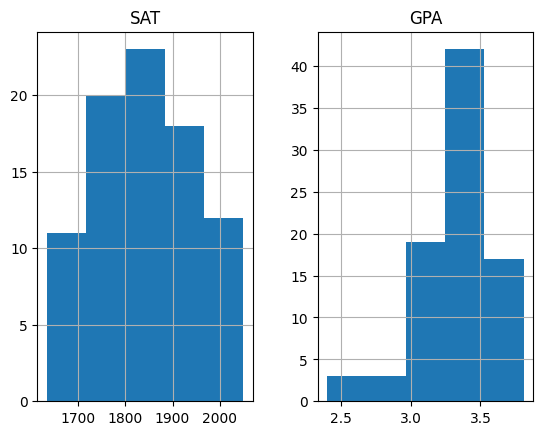

In [9]:
score_data.hist(bins=5)

In [10]:
gpa=score_data['GPA']
SAT=score_data['SAT']

In [11]:
Q1=gpa.quantile(0.25)
Q3=gpa.quantile(0.75)
IQR=Q3-Q1

In [12]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [13]:
outliers=score_data[(gpa<lower_bound) | (gpa>upper_bound) ]
print("Outliers:\n",outliers)

Outliers:
     SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54


In [14]:
Q1=SAT.quantile(0.25)
Q3=SAT.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [15]:
import seaborn as sns

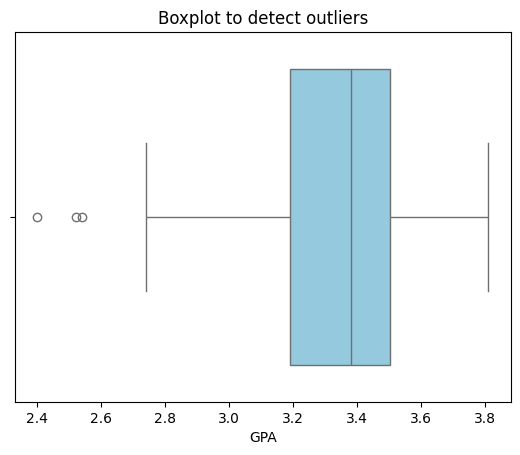

In [16]:
sns.boxplot(x=gpa,color='skyblue')
plt.title("Boxplot to detect outliers")
plt.show()

In [17]:
outliers=score_data[(SAT<lower_bound) | (SAT>upper_bound) ]
print("Outliers:",outliers)

Outliers: Empty DataFrame
Columns: [SAT, GPA]
Index: []


In [18]:

#correlation between columns
score_data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [19]:
#change 2D array into 1D array
X=score_data["SAT"].values.reshape(-1,1)
Y=score_data["GPA"].values.reshape(-1,1)

In [20]:
X.shape

(84, 1)

In [21]:
Y.shape

(84, 1)

Text(0, 0.5, 'GPA')

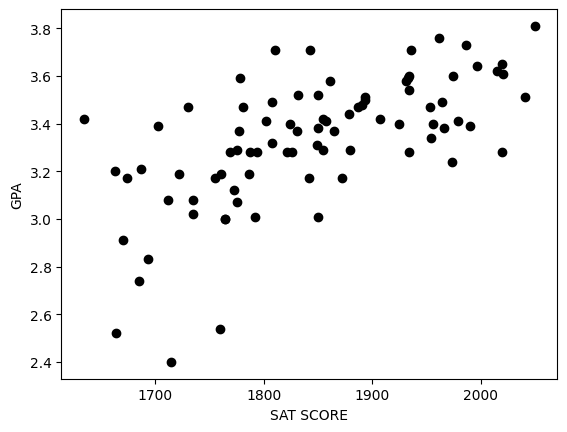

In [22]:
plt.scatter(X,Y,color='black')
plt.xlabel("SAT SCORE")
plt.ylabel("GPA")

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)

xtrain (63, 1)
xtest (21, 1)
ytrain (63, 1)
ytest (21, 1)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

In [27]:
ypred=model.predict(xtest)

In [28]:
ypred

array([[3.47288907],
       [3.14682824],
       [3.24612858],
       [3.07124141],
       [3.17795223],
       [3.47140697],
       [3.17795223],
       [3.33653636],
       [3.11570425],
       [3.32171541],
       [3.37062454],
       [3.50549515],
       [3.34691102],
       [3.55144009],
       [3.40323062],
       [3.39137386],
       [3.35580359],
       [3.56626103],
       [3.5203161 ],
       [3.53958333],
       [3.23723601]])

In [29]:
ytest

array([[3.6 ],
       [2.4 ],
       [3.47],
       [3.2 ],
       [3.08],
       [3.59],
       [3.02],
       [3.17],
       [2.83],
       [3.52],
       [3.37],
       [3.4 ],
       [3.31],
       [3.73],
       [3.47],
       [3.44],
       [3.29],
       [3.64],
       [3.38],
       [3.41],
       [3.07]])

Text(0, 0.5, 'GPA')

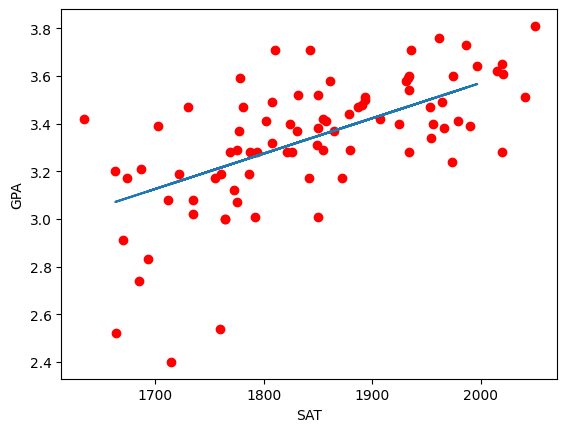

In [30]:
plt.scatter(X,Y,color='r')
plt.plot(xtest,ypred)
plt.xlabel("SAT")
plt.ylabel("GPA")

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [32]:
print("MAE",mean_absolute_error(ytest,ypred))

MAE 0.15548838076312174


In [33]:
print("MSE",mean_squared_error(ytest,ypred))

MSE 0.04587175782015936


In [34]:
#Root mean square
from math import sqrt as sqrt
print("RMSE",sqrt(mean_squared_error(ytest,ypred)))


RMSE 0.2141769311110778


In [35]:
r2=r2_score(ytest,ypred)
print("R^2 (oefficient of determination ",r2)

R^2 (oefficient of determination  0.48516938725866743


In [36]:
#Adjusted R2 Score
N=len(ypred)
p=1
ar2=1-((1-r2)*(1-N)/(N-p-1))
print("Adjusted R2 Score ",ar2)

Adjusted R2 Score  1.54192696078035


In [37]:
#y=a*x+b
a=model.coef_[0][0]
b=model.intercept_[0]
print(f"y = {a:.4f} * x +{b:.4f}")

y = 0.0015 * x +0.6065


In [38]:
model.predict([[2500]])

array([[4.31175465]])

In [39]:
import pickle
picklefile=r"C:\Users\Adhi Ganapathy\Documents\Python_ws\Linear Regression 13072025\Model\Linear_reg.pkl"
with open(picklefile,'wb') as file:
    pickle.dump(model,file)

In [40]:
with open(picklefile,'rb') as file:
    load_model =pickle.load(file)

In [41]:
load_model.predict([[2500]])

array([[4.31175465]])